In [1]:
# import os
import sys
# from pathlib import Path

# module_path = os.path.abspath(os.path.join('../'))
# if module_path not in sys.path:
#     sys.path.append(module_path)

# import json
import numpy as np
# import pandas as pd
# import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


# from tqdm import tqdm
# from pathlib import Path
# from scipy.ndimage import gaussian_filter
# from matplotlib.colors import LogNorm

# sys.path.append("code/preprocessing/utils/")
# from segment2D     import *
# from segment3D     import *
# from file_handling import *

sys.path.append("code/analysis/utils/")
from data_class import AutocorrelationData, SegmentationData#, VariationData,
# from variation_functions import spatial_variation, global_density

# pix_to_um = get_pixel_size()

In [2]:
# experimental parameters
frames_to_hours = 1 / 12


# analytical parameters
bin_data = True
param = 'hh'


# define density colormap
densities  = np.arange(1400, 3600)
Ndensities = len(densities)

cmap   = mpl.colormaps['viridis']
colors = cmap(np.linspace(0.1, 0.9, Ndensities))
sm     = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=densities.min(), vmax=densities.max()))

## Plotting datasets from dish A2

In [ ]:
A2_datasets = ["holomonitor_20240516_A2-1",
               "holomonitor_20240516_A2-7"]

A2_data_avrg = "holomonitor_20240516_A2"

# Load data
A2_cellcorr  = []
A2_fieldcorr = []
A2_cellcorr_avrg  = AutocorrelationData(f"data/experimental/processed/{A2_data_avrg}/cell_autocorr.p")
A2_fieldcorr_avrg = AutocorrelationData(f"data/experimental/processed/{A2_data_avrg}/field_autocorr.p")

i = 0
for data in A2_datasets:
    A2_cellcorr.append(AutocorrelationData(f"data/experimental/processed/{data}/cell_autocorr.p"))
    A2_fieldcorr.append(AutocorrelationData(f"data/experimental/processed/{data}/field_autocorr.p"))

    # add density
    cellprop = SegmentationData(f"data/experimental/processed/{data}/cell_props.p")
    A2_cellcorr[i].add_density(cellprop.A)

    i += 1

State loaded from data/experimental/processed/holomonitor_20240516_A2/cell_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_A2/field_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_A2-1/cell_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_A2-1/field_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_A2-1/cell_props.p.
State saved to data/experimental/processed/holomonitor_20240516_A2-1/cell_autocorr.p
State loaded from data/experimental/processed/holomonitor_20240516_A2-7/cell_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_A2-7/field_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_A2-7/cell_props.p.
State saved to data/experimental/processed/holomonitor_20240516_A2-7/cell_autocorr.p


In [12]:
B1_datasets = ["holomonitor_20240516_B1-13",
               "holomonitor_20240516_B1-22",
               "holomonitor_20240516_B1-22"]

B1_data_avrg = "holomonitor_20240516_B1"

# Load data
B1_cellcorr  = []
B1_fieldcorr = []
B1_cellcorr_avrg  = AutocorrelationData(f"data/experimental/processed/{B1_data_avrg}/cell_autocorr.p")
B1_fieldcorr_avrg = AutocorrelationData(f"data/experimental/processed/{B1_data_avrg}/field_autocorr.p")

i = 0
for data in B1_datasets:
    B1_cellcorr.append(AutocorrelationData(f"data/experimental/processed/{data}/cell_autocorr.p"))
    B1_fieldcorr.append(AutocorrelationData(f"data/experimental/processed/{data}/field_autocorr.p"))

    # add density
    cellprop = SegmentationData(f"data/experimental/processed/{data}/cell_props.p")
    B1_fieldcorr[i].add_density(cellprop.A)
    B1_cellcorr[i].add_density(cellprop.A)

    i += 1

State loaded from data/experimental/processed/holomonitor_20240516_B1-13/cell_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_B1-13/field_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_B1-13/cell_props.p.
State saved to data/experimental/processed/holomonitor_20240516_B1-13/field_autocorr.p
State saved to data/experimental/processed/holomonitor_20240516_B1-13/cell_autocorr.p
State loaded from data/experimental/processed/holomonitor_20240516_B1-22/cell_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_B1-22/field_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_B1-22/cell_props.p.
State saved to data/experimental/processed/holomonitor_20240516_B1-22/field_autocorr.p
State saved to data/experimental/processed/holomonitor_20240516_B1-22/cell_autocorr.p
State loaded from data/experimental/processed/holomonitor_20240516_B1-22/cell_autocorr.p.
State loaded from data/exper

## Plot field correlations

Density array is longer than correlation array! Forcing equal length 104
Density array is longer than correlation array! Forcing equal length 159


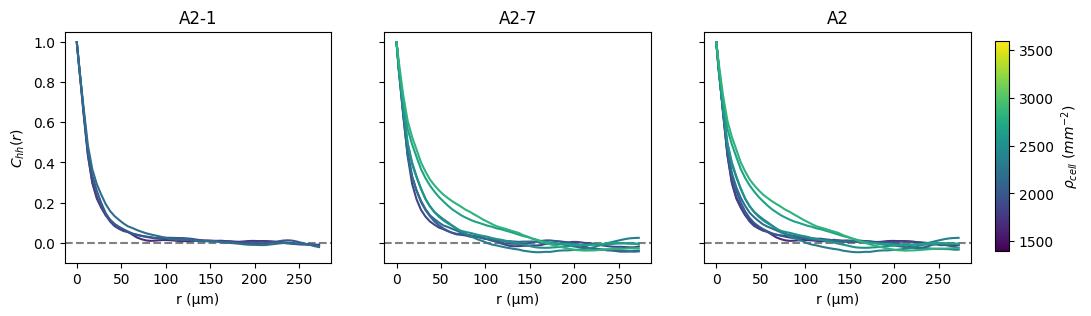

In [7]:
fig, ax = plt.subplots(1,3, figsize=(12,3), sharex=True, sharey=True)
cbar_ax = fig.add_axes([0.9, 0.15, 0.012, 0.7])

# format figure
titles = np.concatenate([A2_datasets, [A2_data_avrg]])
for i in range(len(A2_fieldcorr) + 1):
    ax[i].axhline(0, ls='dashed', c="gray")
    ax[i].set(xlabel="r (µm)", title=titles[i].split("_")[-1])
ax[0].set(ylabel=rf"$C_{{{param}}}(r)$")


# plot A2_datasets
for data_idx in range(len(A2_fieldcorr)):

    # plot data in density bins
    if bin_data:
        data_tmp = A2_fieldcorr[data_idx].bin_data('r', param)
        
        Nbins = len(data_tmp['mean'])
        bin_density = (data_tmp['density_bins'][1:] + data_tmp['density_bins'][:-1]) / 2

        for i in range(Nbins):
            density_idx = int(bin_density[i]) - densities.min()
            ax[data_idx].plot(A2_fieldcorr[data_idx].r_array[param], data_tmp['mean'][i], c=colors[density_idx])

    # plot data per frame
    else:
        Nframes = len(A2_fieldcorr[data_idx].spatial[param])

        for i in range(Nframes):
            density_idx = int(A2_fieldcorr[data_idx].density[i]) - densities.min()
            ax[data_idx].plot(A2_fieldcorr[data_idx].r_array[param], A2_fieldcorr[data_idx].spatial[param][i], c=colors[density_idx])



# plot average
Nbins = len(A2_fieldcorr_avrg.spatial[param])
for i in range(Nbins):
    density_idx = int(A2_fieldcorr_avrg.density[i]) - densities.min()
    ax[2].plot(A2_fieldcorr_avrg.r_array[param], A2_fieldcorr_avrg.spatial[param][i], c=colors[density_idx])


# add colorbar
fig.subplots_adjust(right=0.88);
fig.colorbar(sm, label=r"$\rho_{cell} ~(mm^{-2})$", cax=cbar_ax)

Density array is longer than correlation array! Forcing equal length 145
Density array is longer than correlation array! Forcing equal length 110
Density array is longer than correlation array! Forcing equal length 110


KeyError: 'hh'

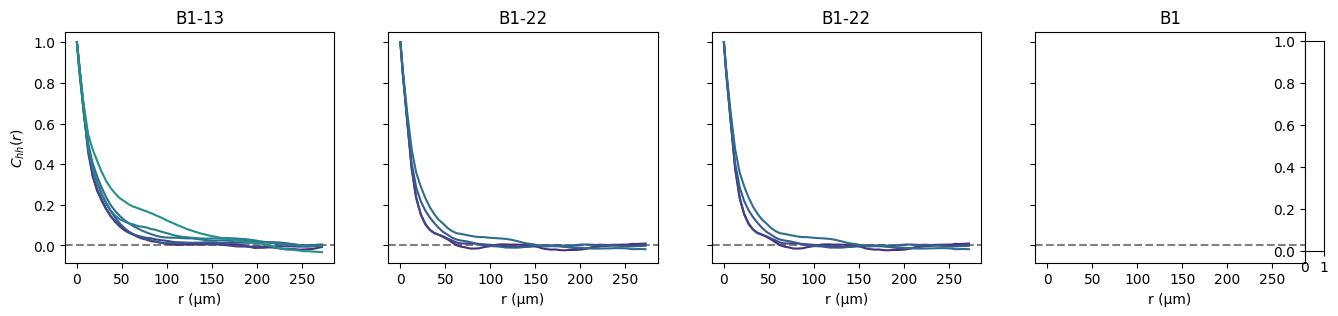

In [13]:
fig, ax = plt.subplots(1,4, figsize=(16,3), sharex=True, sharey=True)
cbar_ax = fig.add_axes([0.9, 0.15, 0.012, 0.7])

# format figure
titles = np.concatenate([B1_datasets, [B1_data_avrg]])
for i in range(len(B1_fieldcorr) + 1):
    ax[i].axhline(0, ls='dashed', c="gray")
    ax[i].set(xlabel="r (µm)", title=titles[i].split("_")[-1])
ax[0].set(ylabel=rf"$C_{{{param}}}(r)$")


# plot B1_datasets
for data_idx in range(len(B1_fieldcorr)):

    # plot data in density bins
    if bin_data:
        data_tmp = B1_fieldcorr[data_idx].bin_data('r', param)
        
        Nbins = len(data_tmp['mean'])
        bin_density = (data_tmp['density_bins'][1:] + data_tmp['density_bins'][:-1]) / 2

        for i in range(Nbins):
            density_idx = int(bin_density[i]) - densities.min()
            ax[data_idx].plot(B1_fieldcorr[data_idx].r_array[param], data_tmp['mean'][i], c=colors[density_idx])

    # plot data per frame
    else:
        Nframes = len(B1_fieldcorr[data_idx].spatial[param])

        for i in range(Nframes):
            density_idx = int(B1_fieldcorr[data_idx].density[i]) - densities.min()
            ax[data_idx].plot(B1_fieldcorr[data_idx].r_array[param], B1_fieldcorr[data_idx].spatial[param][i], c=colors[density_idx])



# plot average
Nbins = len(B1_fieldcorr_avrg.spatial[param])
for i in range(Nbins):
    density_idx = int(B1_fieldcorr_avrg.density[i]) - densities.min()
    ax[2].plot(B1_fieldcorr_avrg.r_array[param], B1_fieldcorr_avrg.spatial[param][i], c=colors[density_idx])


# add colorbar
fig.subplots_adjust(right=0.88);
fig.colorbar(sm, label=r"$\rho_{cell} ~(mm^{-2})$", cax=cbar_ax)

## Plot cell correlations

IndexError: index 3 is out of bounds for axis 0 with size 3

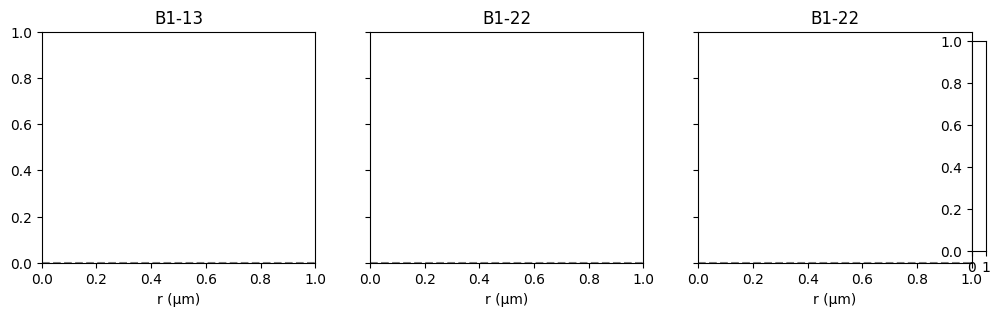

In [47]:
fig, ax = plt.subplots(1,3, figsize=(12,3), sharex=True, sharey=True)
cbar_ax = fig.add_axes([0.9, 0.15, 0.012, 0.7])

# format figure
titles = np.concatenate([datasets, [data_avrg]])
for i in range(len(cellcorr) + 1):
    ax[i].axhline(0, ls='dashed', c="gray")
    ax[i].set(xlabel="r (µm)", title=titles[i].split("_")[-1])
ax[0].set(ylabel=rf"$C_{{{param}}}(r)$")


# plot datasets
for data_idx in range(len(cellcorr)):

    # plot data in density bins
    if bin_data:
        data_tmp = cellcorr[data_idx].bin_data('r', param)
        
        Nbins = len(data_tmp['mean'])
        bin_density = (data_tmp['density_bins'][1:] + data_tmp['density_bins'][:-1]) / 2

        for i in range(Nbins):
            density_idx = int(bin_density[i]) - densities.min()
            ax[data_idx].plot(cellcorr[data_idx].r_array[param], data_tmp['mean'][i], c=colors[density_idx])

    # plot data per frame
    else:
        Nframes = len(cellcorr[data_idx].spatial[param])

        for i in range(Nframes):
            density_idx = int(cellcorr[data_idx].density[i]) - densities.min()
            ax[data_idx].plot(cellcorr[data_idx].r_array[param], cellcorr[data_idx].spatial[param][i], c=colors[density_idx])



# plot average
Nbins = len(cellcorr_avrg.spatial[param])
for i in range(Nbins):
    density_idx = int(cellcorr_avrg.density[i]) - densities.min()
    ax[2].plot(cellcorr_avrg.r_array[param], cellcorr_avrg.spatial[param][i], c=colors[density_idx])


# add colorbar
fig.subplots_adjust(right=0.88);
fig.colorbar(sm, label=r"$\rho_{cell} ~(mm^{-2})$", cax=cbar_ax)

Density array is longer than correlation array! Forcing equal length 145
Density array is longer than correlation array! Forcing equal length 110
Density array is longer than correlation array! Forcing equal length 110


KeyError: 'hh'

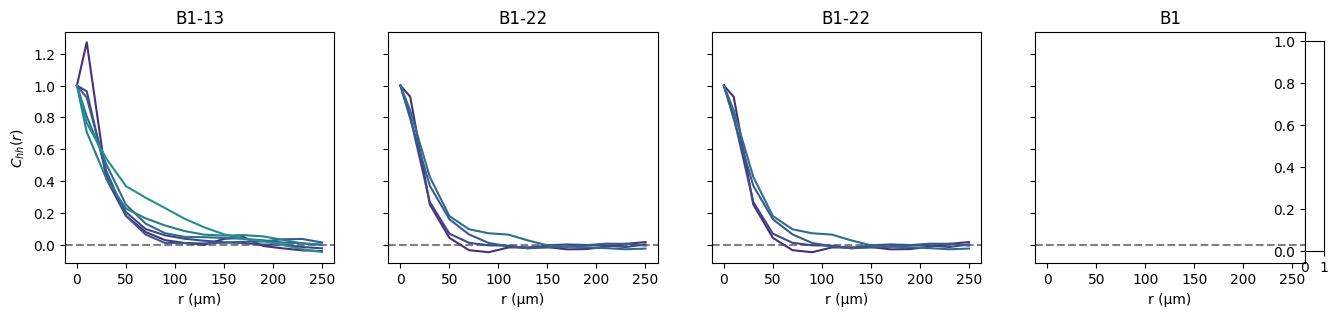

In [48]:
fig, ax = plt.subplots(1,4, figsize=(16,3), sharex=True, sharey=True)
cbar_ax = fig.add_axes([0.9, 0.15, 0.012, 0.7])

# format figure
titles = np.concatenate([datasets, [data_avrg]])
for i in range(len(cellcorr) + 1):
    ax[i].axhline(0, ls='dashed', c="gray")
    ax[i].set(xlabel="r (µm)", title=titles[i].split("_")[-1])
ax[0].set(ylabel=rf"$C_{{{param}}}(r)$")


# plot datasets
for data_idx in range(len(cellcorr)):

    # plot data in density bins
    if bin_data:
        data_tmp = cellcorr[data_idx].bin_data('r', param)
        
        Nbins = len(data_tmp['mean'])
        bin_density = (data_tmp['density_bins'][1:] + data_tmp['density_bins'][:-1]) / 2

        for i in range(Nbins):
            density_idx = int(bin_density[i]) - densities.min()
            ax[data_idx].plot(cellcorr[data_idx].r_array[param], data_tmp['mean'][i], c=colors[density_idx])

    # plot data per frame
    else:
        Nframes = len(cellcorr[data_idx].spatial[param])

        for i in range(Nframes):
            density_idx = int(cellcorr[data_idx].density[i]) - densities.min()
            ax[data_idx].plot(cellcorr[data_idx].r_array[param], cellcorr[data_idx].spatial[param][i], c=colors[density_idx])



# plot average
Nbins = len(cellcorr_avrg.spatial[param])
for i in range(Nbins):
    density_idx = int(cellcorr_avrg.density[i]) - densities.min()
    ax[2].plot(cellcorr_avrg.r_array[param], cellcorr_avrg.spatial[param][i], c=colors[density_idx])


# add colorbar
fig.subplots_adjust(right=0.88);
fig.colorbar(sm, label=r"$\rho_{cell} ~(mm^{-2})$", cax=cbar_ax)